In [1]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [39]:
#let's tell our second model what the prior probabilities are
classcounts = np.bincount(y_train)
classpriors = classcounts / len(y_train)

In [3]:
songs = pd.read_csv('songs_final422.csv')

In [5]:
X = songs['Stemmed No Stop Words']

In [7]:
y = songs['Genre']

In [9]:
le = LabelEncoder()
y_le = le.fit_transform(y)

In [11]:
print("Classes:", le.classes_)

Classes: ['Country' 'EDM' 'Pop' 'R&B' 'Rap' 'Rock']


In [13]:
#we need to vectorize X since SVM can not interpret raw text
bagofwords = CountVectorizer()
X = bagofwords.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_le, test_size=0.20, random_state=51)

In [19]:
#a base model without adjusting class_weights to account for class imbalance
nbmodel1 = MultinomialNB()

In [23]:
nbmodel1.fit(X_train, y_train)

MultinomialNB()

In [25]:
nb1_predictions = nbmodel1.predict(X_test)

In [27]:
nb1_report = classification_report(y_test, nb1_predictions, target_names=["Country", "EDM", "Pop", "R&B", "Rap", "Rock"])
print(nb1_report)

              precision    recall  f1-score   support

     Country       0.26      0.12      0.16        85
         EDM       0.46      0.13      0.20       233
         Pop       0.51      0.62      0.56       742
         R&B       0.28      0.11      0.16       169
         Rap       0.75      0.75      0.75       412
        Rock       0.46      0.61      0.52       435

    accuracy                           0.53      2076
   macro avg       0.45      0.39      0.39      2076
weighted avg       0.51      0.53      0.50      2076



In [33]:
# create a confusion matrix for the balanced model
nb1_cm = confusion_matrix(y_test, nb1_predictions)


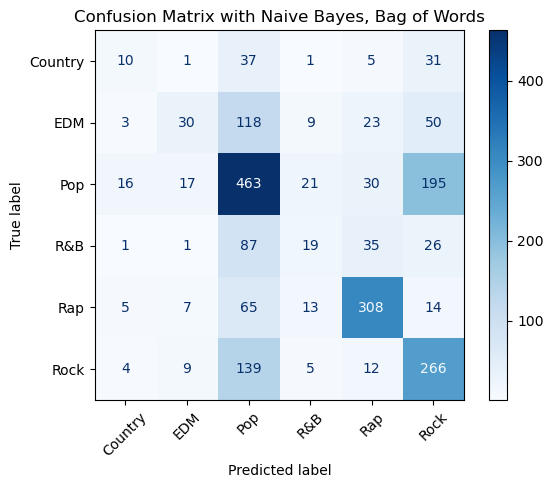

In [35]:
# plot the confusion matrix
nb1_cm_plot = ConfusionMatrixDisplay(confusion_matrix=nb1_cm, display_labels=["Country", "EDM", "Pop", "R&B", "Rap", "Rock"])
nb1_cm_plot.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix with Naive Bayes, Bag of Words")
plt.show()

In [49]:
from gensim.models import Word2Vec

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [51]:
word2vec_model = Word2Vec(X, vector_size=100, window=5, min_count=1, workers=4)
wvX = word2vec_model.wv

TypeError: unhashable type: 'csr_matrix'